# breast cancer Dataset Analysis

This notebook explores the breast cancer  dataset from Kaggle and builds ML models using custom implementations.

In [20]:
import warnings
warnings.filterwarnings("ignore")
# Download Dataset from Kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("neurocipher/breast-cancer-dataset")

#print("Path to dataset files:", path)


In [21]:
import pandas as pd
import os
df = pd.read_csv(os.path.join(path, 'data.csv'))


df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
# Explore Dataset Structure

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [23]:
# Check for missing values

print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values per column:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst

In [24]:
print(df.columns)
df=df.drop(columns=['Unnamed: 32'])
df.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# Check target distribution

target_col = 'diagnosis'

print(f"Target column: {target_col}")
print(f"\nTarget distribution:")
print(df[target_col].value_counts())
print(f"\nTarget distribution (%):")
print(df[target_col].value_counts(normalize=True) * 100)

Target column: diagnosis

Target distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Target distribution (%):
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [26]:
# Explore categorical columns

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

Categorical columns: ['diagnosis']

diagnosis value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


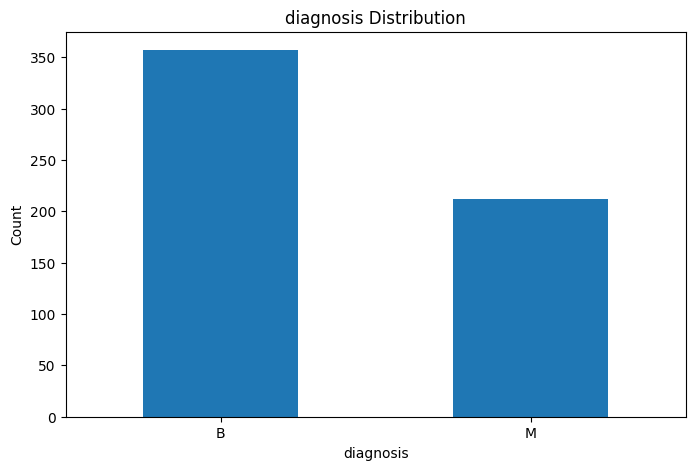

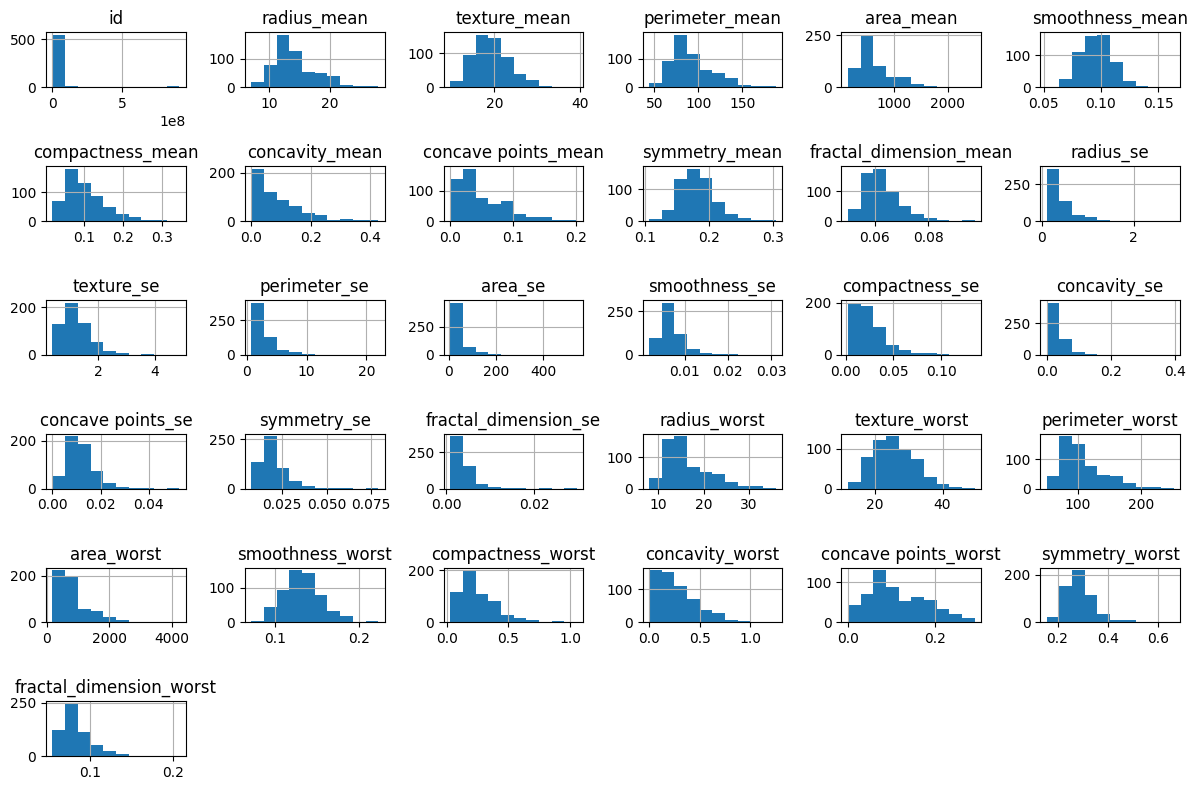

In [27]:
# Visualize distributions

import matplotlib.pyplot as plt
import seaborn as sns

# Plot target distribution
plt.figure(figsize=(8, 5))
df[target_col].value_counts().plot(kind='bar')
plt.title('diagnosis Distribution')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot numerical features distributions
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != target_col]

if len(numerical_cols) > 0:
    df[numerical_cols].hist(figsize=(12, 8))
    plt.tight_layout()
    plt.show()

In [28]:
# all columns in the dataset are float rn and the target column is only a object so i will take it as Y then encode it as 0 and 1

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()
# now i will let it be as Y and the rest of the columns will be X

Y = df['diagnosis']
X = df.drop(columns=['diagnosis'])


In [29]:
import sys
import numpy as np
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print(f"\nTraining classes distribution:")
print(y_train.value_counts())
print(f"\nTest classes distribution:")
print(y_test.value_counts())

Training set shape: (455, 31)
Test set shape: (114, 31)

Training classes distribution:
diagnosis
0    286
1    169
Name: count, dtype: int64

Test classes distribution:
diagnosis
0    71
1    43
Name: count, dtype: int64


In [30]:
# Train Logistic Regression Model

from src import get_logistic_regression

lr_model = get_logistic_regression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")
print(f"Model type: {type(lr_model).__name__}")

Logistic Regression model trained successfully!
Model type: LogisticRegression


In [31]:
# Train Random Forest Classifier Model

from src import get_random_forest_classifier

rf_model = get_random_forest_classifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained successfully!")
print(f"Model type: {type(rf_model).__name__}")

Random Forest Classifier model trained successfully!
Model type: RandomForestClassifier


# Model Evaluation

In [32]:
# Evaluate Logistic Regression

from src import display_metrics, precision, recall, f1_score
from sklearn.metrics import accuracy_score

y_pred_lr = lr_model.predict(X_test)

print("="*60)
print("LOGISTIC REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

display_metrics(y_test, y_pred_lr, task_type='classification')

LOGISTIC REGRESSION MODEL PERFORMANCE
Accuracy: 0.9561
Precision: 0.9750
Recall: 0.9070
F1 Score: 0.9398
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 0.975000
  Recall:    0.906977
  F1 Score:  0.939759



In [33]:
# Evaluate Random Forest Classifier

y_pred_rf = rf_model.predict(X_test)

print("="*60)
print("RANDOM FOREST CLASSIFIER MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

display_metrics(y_test, y_pred_rf, task_type='classification')

RANDOM FOREST CLASSIFIER MODEL PERFORMANCE
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 0.975610
  Recall:    0.930233
  F1 Score:  0.952381



In [34]:
# Compare Models

print("="*60)
print("MODEL COMPARISON")
print("="*60)
print(f"{'Metric':<15} {'Logistic Regression':<20} {'Random Forest':<20}")
print("-"*60)
print(f"{'Accuracy':<15} {accuracy_score(y_test, y_pred_lr):<20.4f} {accuracy_score(y_test, y_pred_rf):<20.4f}")
print(f"{'Precision':<15} {precision(y_test, y_pred_lr):<20.4f} {precision(y_test, y_pred_rf):<20.4f}")
print(f"{'Recall':<15} {recall(y_test, y_pred_lr):<20.4f} {recall(y_test, y_pred_rf):<20.4f}")
print(f"{'F1 Score':<15} {f1_score(y_test, y_pred_lr):<20.4f} {f1_score(y_test, y_pred_rf):<20.4f}")
print("="*60)

MODEL COMPARISON
Metric          Logistic Regression  Random Forest       
------------------------------------------------------------
Accuracy        0.9561               0.9649              
Precision       0.9750               0.9756              
Recall          0.9070               0.9302              
F1 Score        0.9398               0.9524              


# Cross-Validation and Grid Search

In [35]:
# K-Fold Cross-Validation

from src import cross_validate
from sklearn.metrics import accuracy_score
from src import get_random_forest_classifier

# Prepare dataframe for cross-validation
df_cv = pd.concat([X, Y], axis=1)
df_cv.rename(columns={'diagnosis': 'target'}, inplace=True)

print("=== Custom K-Fold Cross-Validation ===")
best_model_cv, mean_score, std_score, all_scores = cross_validate(
    dataframe=df_cv,
    model=get_random_forest_classifier,
    target_col='target',
    k_folds=5,
    metric=accuracy_score,
    shuffle=True,
    random_state=42,
    n_estimators=100
)

print(f"Mean Accuracy: {mean_score:.4f} (+/- {std_score:.4f})")
print(f"All fold scores: {[f'{s:.4f}' for s in all_scores]}")

=== Custom K-Fold Cross-Validation ===
Mean Accuracy: 0.9578 (+/- 0.0117)
All fold scores: ['0.9646', '0.9735', '0.9381', '0.9558', '0.9573']


In [36]:
# Grid Search for Hyperparameter Tuning

from src import grid_search_cv

print("\n=== Grid Search with Random Forest Classifier ===")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = grid_search_cv(
    model=get_random_forest_classifier,
    X=X_train.values,
    y=y_train.values,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (accuracy): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest Model Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision(y_test, y_pred_best):.4f}")
print(f"Recall: {recall(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
display_metrics(y_test, y_pred_best, task_type='classification')


=== Grid Search with Random Forest Classifier ===
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score (accuracy): 0.9582

Best Model Performance on Test Set:
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 0.975610
  Recall:    0.930233
  F1 Score:  0.952381



# Save and Load Model

In [37]:
# Save the best model from grid search

import joblib
import os

# Create models directory if it doesn't exist
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

# Save the model with a descriptive name
model_filename = 'breast_cancer_rf_best_model.joblib'
model_path = os.path.join(models_dir, model_filename)

joblib.dump(best_model, model_path)
print(f"Model saved successfully to: {model_path}")
print(f"Model parameters: {grid_search.best_params_}")

Model saved successfully to: trained_models/breast_cancer_rf_best_model.joblib
Model parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
# Load the saved model and evaluate on test data

loaded_model = joblib.load(model_path)
print(f"Model loaded successfully from: {model_path}")

# Make predictions on test data
y_pred_loaded = loaded_model.predict(X_test)

print("\n" + "="*60)
print("LOADED MODEL PERFORMANCE ON TEST DATA")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded):.4f}")
print(f"Precision: {precision(y_test, y_pred_loaded):.4f}")
print(f"Recall: {recall(y_test, y_pred_loaded):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_loaded):.4f}")

display_metrics(y_test, y_pred_loaded, task_type='classification')

Model loaded successfully from: trained_models/breast_cancer_rf_best_model.joblib

LOADED MODEL PERFORMANCE ON TEST DATA
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
MODEL PERFORMANCE METRICS

Classification Metrics:
  Precision: 0.975610
  Recall:    0.930233
  F1 Score:  0.952381

